#모수 확률밀도 추정(Parametric Density Estimation) : 클래스별 


*   확률 모델 가정 후 값(파라미터) 추정 : 평균이나 분산 등
*   단점 : 추정한 밀도함수와 모집단 밀도 함수 차이 시 의미 없음



## 데이터가 가우시안 분포로 가정
$
p(x|C_k) = G(x;μ_k, Σ_k) \\
= \frac{1}{\sqrt{2π_n}\sqrt{|Σ_k|}}\exp[-\frac{1}{2}(x-μ_k)^TΣ_k^{-1}(x-μ_k)]
$

In [1]:
import numpy as np
np.random.seed(0)

row_count = 200

### 단변량 분포

In [2]:
x = np.linspace(-8, 8, row_count)

mu_1, sigma_1 = 0.0, 1.0
mu_2, sigma_2 = 1.5, 1.5
mu_3, sigma_3 = 3.0, 2.0

y_1 = (1 / np.sqrt(2 * np.pi * sigma_1**2)) * np.exp(-(x-mu_1)**2 / (2 * sigma_1**2))
y_2 = (1 / np.sqrt(2 * np.pi * sigma_2**2)) * np.exp(-(x-mu_2)**2 / (2 * sigma_2**2))
y_3 = (1 / np.sqrt(2 * np.pi * sigma_3**2)) * np.exp(-(x-mu_3)**2 / (2 * sigma_3**2))
print(y_1.var(),  y_2.var(), y_3.var()) # 분산
print(y_1.std(),  y_2.std(), y_3.std()) # 표준편차
type(x), x.shape, y_1.shape, x.mean(),#x, y_1 

0.013675484707188056 0.007827944897583367 0.004947717420012018
0.11694222807518273 0.0884756740442443 0.0703400129372466


(numpy.ndarray, (200,), (200,), 2.842170943040401e-16)

In [3]:
import matplotlib.pyplot as plt

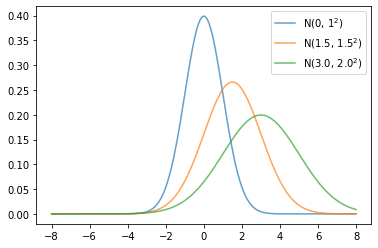

In [4]:
plt.plot(x, y_1, alpha=0.7, label=r'N(0, $1^2$)')
plt.plot(x, y_2, alpha=0.7, label=r'N(1.5, $1.5^2$)')
plt.plot(x, y_3, alpha=0.7, label='N(3.0, $2.0^2$)')
plt.legend(ncol=1)

In [5]:
x_rand = np.sort(np.random.randn(row_count))  # 그래프 분포 점 표시 위해 정렬
x_rand.shape, x_rand.mean(), x_rand.std()# x_rand

((200,), 0.0709104931411612, 1.0214227686959954)

In [6]:
mu_rand, sigma_rand = -0.08, 0.96   # 비교 위해 평균과 분산 조정
y_rand = (1 / np.sqrt(2 * np.pi * sigma_rand**2)) * np.exp(-(x_rand-mu_rand)**2 / (2 * sigma_rand**2))

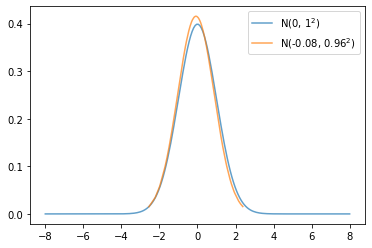

In [7]:
x_like = np.full_like(x, fill_value=-0.001)  
# plt.plot(x, x_like, 'o', color='blue', ms=1, ls='None', label=r'P N(0, $1^2$)') # 수직선 상에 표시

plt.plot(x, y_1, alpha=0.7, label=r'N(0, $1^2$)')
plt.plot(x_rand, y_rand, alpha=0.7, label=r'N(-0.08, $0.96^2$)')
plt.legend(ncol=1)

###다변량 분포

In [8]:
normal_rand_1 = np.random.randn(row_count, 2)
# normal_rand_1, 
normal_rand_1.shape, type(normal_rand_1)

((200, 2), numpy.ndarray)

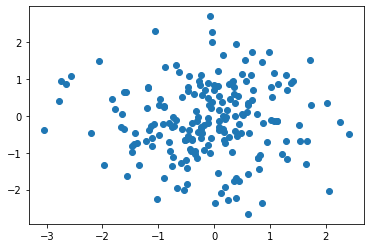

In [9]:
plt.plot(normal_rand_1[:,1], normal_rand_1[:,0],marker='o', linestyle='None')

$
p(x|C_k) = G(x;μ_k, Σ_k) \\
= \frac{1}{\sqrt{2π_n}\sqrt{|Σ_k|}}\exp[-\frac{1}{2}(x-μ_k)^TΣ_k^{-1}(x-μ_k)]
$

In [26]:
mu_rand, sigma_rand = np.array([0,0]), np.eye(1, dtype=int) # 정규 평균과 공분산 행렬 정의
mu_rand, sigma_rand

(array([0, 0]), array([[1]]))

In [27]:
np.invert(sigma_rand), sigma_rand

(array([[-2]]), array([[1]]))

In [33]:
# normal_rand_1[:,1].shape
(normal_rand_1-mu_rand).shape, (normal_rand_1[1]-mu_rand).shape

((200, 2), (2,))

In [30]:
1/np.sqrt(2*np.pi*np.linalg.det(sigma_rand))*np.exp(-1/2*(normal_rand_1-mu_rand)*np.invert(sigma_rand)*(normal_rand_1-mu_rand))

array([[4.57195905e-01, 4.22470295e-01],
       [1.33684545e+00, 6.12891120e-01],
       [6.00994099e-01, 5.44996026e+00],
       [3.99178428e-01, 6.87805689e-01],
       [4.31459879e-01, 4.02804062e-01],
       [9.13462561e-01, 4.41176112e-01],
       [7.40353970e-01, 4.95894657e-01],
       [9.73400369e-01, 4.71989857e-01],
       [3.99057869e-01, 4.60619713e-01],
       [6.57288799e+01, 3.99655295e-01],
       [9.94905333e-01, 4.49672767e-01],
       [4.94594371e-01, 5.03025646e-01],
       [4.28498438e+00, 4.00542078e-01],
       [4.08834751e-01, 4.21038711e-01],
       [5.69981117e-01, 4.22176509e-01],
       [3.03135871e+00, 5.08864236e-01],
       [5.35668408e-01, 4.74335267e-01],
       [1.51864620e+00, 7.34424515e-01],
       [3.72305855e+00, 2.89595338e+01],
       [4.78431599e-01, 6.30820425e-01],
       [5.98928789e-01, 4.67145905e-01],
       [4.06049062e-01, 4.35936310e-01],
       [4.38914995e-01, 6.61970115e+00],
       [1.50520560e+00, 1.27971548e+00],
       [7.730766